# Kaczmarz Method(s)

In [89]:
using LinearAlgebra
n, m = 10, 4
A = randn(n,m)
x = randn(m)
display(x)
b = A*x
norm(A\b -x)

4-element Array{Float64,1}:
 -2.3575138956180073 
  0.15031097384931766
  1.1251094035874853 
 -1.3925871725029235 

5.688200336284365e-16

In [90]:
x0 = zeros(size(x));
x1 = copy(x0);
normscyc = zeros(1,100);

The Kaczmarz update step is:
$$x_{k+1}=x_k+\frac{(b_j - A[j,:]'*x_k}{\|A[j,:]\|^2}*A[j,:]$$
where 
$j \in {1, ..., n}$ 
is a row number.

## Cyclical Kaczmarz

In [91]:
rep = 20

for j in 1:rep
    for i in 1:n
    x1 = x0+((b[i] - A[i,:]'*x0)/norm(A[i,:])^2)*A[i,:]
    x0 = copy(x1)
    end
    normscyc[j] = norm(b-A*x0)
end
x1

4-element Array{Float64,1}:
 -2.3575138956180073 
  0.15031097384931744
  1.1251094035874853 
 -1.3925871725029235 

## Random Permutation Kaczmarz

In [92]:
using Random
x0=zeros(size(x))
norms=zeros(1,rep)
for k in 1:rep
    pk = randperm(n)
    B = A[pk,:]
    c = b[pk]
    for i in 1:n
        x1 = x0+((c[i] - B[i,:]'*x0)/norm(B[i,:])^2)*B[i,:]
        x0 = copy(x1)
    end
    norms[k] = norm(b-A*x0)
end
x1

4-element Array{Float64,1}:
 -2.3575138956180073
  0.1503109738493176
  1.1251094035874856
 -1.3925871725029235

## Randomized Kaczmarz

In [93]:
pr = zeros(1,n)
Anorm = norm(A)^2
for i in 1:n
    pr[i] = norm(A[i,:])^2/Anorm
end
cumpr = cumsum(pr, dims=2)
rn = rand(n*rep)
rows = ones(1,n*rep)
for j in 1:(n*rep)
    for i in 1:n
        if (rn[j]>cumpr[i]) 
            rows[j] = i + 1
        end
    end
end
    

In [95]:
x0=zeros(size(x))
normsrnd=zeros(1,rep)
for k in 0:(rep-1)
    for i in 1:n
        r = convert(Int64, rows[k*10+i])
 #       display([k i r])
        x1 = x0+((b[r] - A[r,:]'*x0)/norm(A[r,:])^2)*A[r,:]
        x0 = copy(x1)
    end
    normsrnd[k+1] = norm(b-A*x0)
end
x0

4-element Array{Float64,1}:
 -2.35751389563988   
  0.15031097383254122
  1.1251094035993225 
 -1.3925871725018175 

In [96]:
using RCall
@rput norms
@rput normscyc
@rput normsrnd

1×20 Array{Float64,2}:
 0.316111  0.0362922  0.0221352  0.00693504  …  1.33804e-10  6.69898e-11

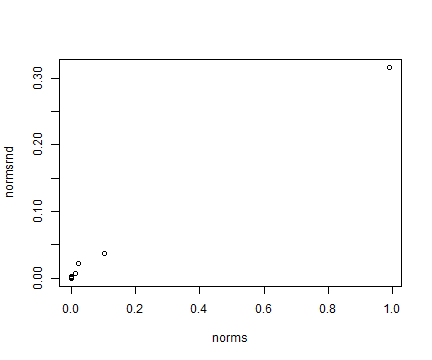

RObject{NilSxp}
NULL


In [97]:
R"plot(norms, normsrnd)"